Instalar a biblioteca `ultralytics`.

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

Criar diretório `segmentacao` e adicionar a pasta `dataset` copiada do Google Drive.

In [ ]:
!mkdir /content/segmentacao
!mkdir /content/segmentacao/dataset/

import gdown

#https://drive.google.com/file/d/1eEUt7HBRmjo49GuJcdiF35yRyFX7Yu6H/view?usp=sharing

file_id = '1eEUt7HBRmjo49GuJcdiF35yRyFX7Yu6H'
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', 'dataset.zip', quiet=False)
#!mv best.pt /content/segmentacao/model/
!unzip -o dataset.zip -d /content/segmentacao/dataset/

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1eEUt7HBRmjo49GuJcdiF35yRyFX7Yu6H
From (redirected): https://drive.google.com/uc?export=download&id=1eEUt7HBRmjo49GuJcdiF35yRyFX7Yu6H&confirm=t&uuid=f43f59a2-d98a-4607-ac46-49f3f8467fa3
To: /content/dataset.zip
100%|██████████| 200M/200M [00:04<00:00, 44.6MB/s]


Archive:  dataset.zip
  inflating: /content/segmentacao/dataset/README.dataset.txt  
  inflating: /content/segmentacao/dataset/README.roboflow.txt  
  inflating: /content/segmentacao/dataset/data.yaml  
   creating: /content/segmentacao/dataset/test/
   creating: /content/segmentacao/dataset/test/images/
 extracting: /content/segmentacao/dataset/test/images/estadaEscuro01_mp4-12_jpg.rf.8a6c91d782f5650f18993bd6001bb072.jpg  
 extracting: /content/segmentacao/dataset/test/images/estrada00Flip_mp4-0_jpg.rf.d937b6a18ec7abae392cb811a74d0586.jpg  
 extracting: /content/segmentacao/dataset/test/images/estrada00Flip_mp4-11_jpg.rf.9380b0641b8ac0cb39691bbf9e1f77d0.jpg  
 extracting: /content/segmentacao/dataset/test/images/estrada00Flip_mp4-33_jpg.rf.239e106839e3de62964e7f27e570fdd3.jpg  
 extracting: /content/segmentacao/dataset/test/images/estrada00_mp4-118_jpg.rf.0ea6e4562aeeb80f029e02cf624cc217.jpg  
 extracting: /content/segmentacao/dataset/test/images/estrada00_mp4-127_jpg.rf.2b4b0ee111828

O conteúdo da pasta `dataset` foi gerado utilizando o seguinte projeto no Roboflow:

https://universe.roboflow.com/visao/segmentacaoartigo

Clicar na opção `Download this Dataset` e escolher:

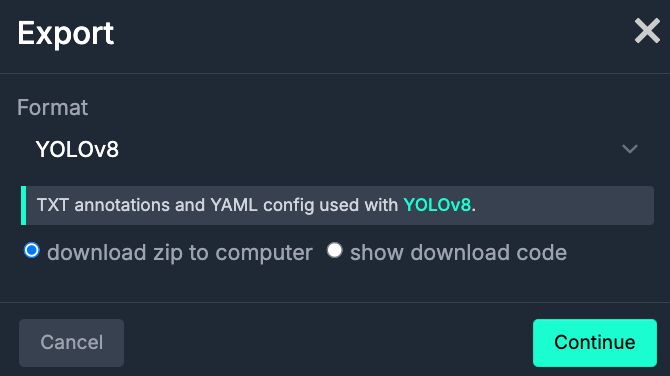

Utilizar a rede `yolo` da biblioteca `ultralytics`.

In [ ]:
from ultralytics import YOLO

Iniciar o treinamento com 320 épocas executando a célula seguinte. O resultado desse treinamento será salvo em:

> /content/runs/detect/train/weights/best.pt

Esse arquivo `best.pt` será utilizado para fazer a predição em vídeos de teste utilizando o seguinte Colab:

https://colab.research.google.com/drive/1YawDZ0nHZAdeMwvynjYwxzdAlTJUzYA1

Observar que na pasta `/content/runs/detect/train/weights/` existem várias informações importantes desse treinamento.

Para treinar utilizando a GPU do Colab, ir em `Ambiente de execução` e `Alterar o tipo de ambiente de execução`, escolhendo a opção `T4 GPU`. Mesmo assim, **esse treinamento vai demorar mais de três horas...**

In [ ]:
!yolo task=segment mode=train model=yolov8n-seg.pt data=/content/segmentacao/dataset/data.yaml epochs=220 imgsz=640 plots=True

100% 6.74M/6.74M [00:00<00:00, 189MB/s]
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/segmentacao/dataset/data.yaml, epochs=220, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False